# Выполнил Андросов Дмитрий, М05-012б
## Визуализация ациклических орграфов

Ссылка на github репозиторий: \
https://github.com/AndrosovDima/dataviz/tree/main/hw_2


Сколнируем репозиторий, чтобы иметь возможность читать файл с деревом оттуда

In [1]:
! git clone https://github.com/AndrosovDima/dataviz

fatal: destination path 'dataviz' already exists and is not an empty directory.


In [2]:
import numpy as np
from scipy.optimize import linprog

In [3]:
import networkx as nx
G = nx.read_graphml('dataviz/hw_2/small_dag.graphml')

/usr/local/lib/python3.7/dist-packages/networkx/readwrite/graphml.py:946: UserWarning: No key type for id d4. Using string
  warnings.warn(f"No key type for id {attr_id}. Using string")
/usr/local/lib/python3.7/dist-packages/networkx/readwrite/graphml.py:946: UserWarning: No key type for id d5. Using string
  warnings.warn(f"No key type for id {attr_id}. Using string")
/usr/local/lib/python3.7/dist-packages/networkx/readwrite/graphml.py:946: UserWarning: No key type for id d6. Using string
  warnings.warn(f"No key type for id {attr_id}. Using string")
/usr/local/lib/python3.7/dist-packages/networkx/readwrite/graphml.py:946: UserWarning: No key type for id d7. Using string
  warnings.warn(f"No key type for id {attr_id}. Using string")
/usr/local/lib/python3.7/dist-packages/networkx/readwrite/graphml.py:946: UserWarning: No key type for id d8. Using string
  warnings.warn(f"No key type for id {attr_id}. Using string")
/usr/local/lib/python3.7/dist-packages/networkx/readwrite/graphml.py:9

In [4]:
def get_nodes(graph):
  nodes = []
  for l in graph.adjacency():
    nodes.append(l[0])
  return nodes

nodes = get_nodes(G)
nodes

['n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14']

In [5]:
def get_edges(graph):
  edges = []
  for e in graph.edges:
    edges.append(e)
  return edges

edges = get_edges(G)
edges

[('n0', 'n1'),
 ('n0', 'n2'),
 ('n0', 'n3'),
 ('n1', 'n7'),
 ('n2', 'n8'),
 ('n3', 'n4'),
 ('n4', 'n5'),
 ('n4', 'n6'),
 ('n5', 'n6'),
 ('n7', 'n14'),
 ('n8', 'n9'),
 ('n8', 'n10'),
 ('n8', 'n11'),
 ('n9', 'n12'),
 ('n10', 'n11'),
 ('n12', 'n13'),
 ('n13', 'n11'),
 ('n13', 'n14')]

Создадим список смежности, которым задается граф

In [6]:
def get_adj_list(graph):
  adj_list = {}
  for par in graph.adjacency():
    adj_list[par[0]] = []
    for ch in par[1].keys():
      adj_list[par[0]].append(ch)
  return adj_list

adj_list = get_adj_list(G)
adj_list

{'n0': ['n1', 'n2', 'n3'],
 'n1': ['n7'],
 'n10': ['n11'],
 'n11': [],
 'n12': ['n13'],
 'n13': ['n11', 'n14'],
 'n14': [],
 'n2': ['n8'],
 'n3': ['n4'],
 'n4': ['n5', 'n6'],
 'n5': ['n6'],
 'n6': [],
 'n7': ['n14'],
 'n8': ['n9', 'n10', 'n11'],
 'n9': ['n12']}

Функция, которая ищет ноды без предшественников

In [7]:
def get_sources(graph):
  sources = []
  nodes = get_nodes(graph)
  adj_list = get_adj_list(graph)
  for node in nodes:
    cnt = 0
    for n in adj_list.keys():
      cnt += adj_list[n].count(node)
    if cnt == 0:
      sources.append(node)
  return sources

sources = get_sources(G)
sources

['n0']

Функция, которая ищет предшественников для каждой вершины

In [8]:
def get_parents(graph):
  parents = dict()
  nodes = get_nodes(graph)
  adj_list = get_adj_list(graph)
  for node in nodes:
    parents[node] = []
    for n in adj_list.keys():
      if adj_list[n].count(node) > 0:
        parents[node].append(n)
  return parents

parents = get_parents(G)
parents

{'n0': [],
 'n1': ['n0'],
 'n10': ['n8'],
 'n11': ['n8', 'n10', 'n13'],
 'n12': ['n9'],
 'n13': ['n12'],
 'n14': ['n7', 'n13'],
 'n2': ['n0'],
 'n3': ['n0'],
 'n4': ['n3'],
 'n5': ['n4'],
 'n6': ['n4', 'n5'],
 'n7': ['n1'],
 'n8': ['n2'],
 'n9': ['n8']}

In [9]:
def get_labeled_parents(nodes, parents, labels_dict):
  labeled_parents = dict()
  for node in nodes:
    labeled_parents[node] = []
    for parent in parents[node]:
      if parent in labels_dict.keys():
        labeled_parents[node].append(labels_dict[parent])
    labeled_parents[node] = labeled_parents[node][::-1]
  return labeled_parents

In [10]:
def vertex_labeling(graph):
  nodes = get_nodes(graph)
  sources = get_sources(graph)
  parents = get_parents(graph)
  labeled_parents = dict()
  labels_dict = dict()
  label = 1
  unlabeled_nodes = nodes.copy()
  for source in sources:
    labels_dict[source] = label
    label += 1
    unlabeled_nodes.remove(source)
  while unlabeled_nodes != []:
    labeled_parents = get_labeled_parents(nodes, parents, labels_dict)
    current = []
    for node in unlabeled_nodes:
      if len(parents[node]) == len(labeled_parents[node]):
        current.append(node)
    current.sort(key=lambda x: labeled_parents[x])
    for curr in current:
      labels_dict[curr] = label
      label += 1
      unlabeled_nodes.remove(curr)
  
  return labels_dict

nodes_to_labels = vertex_labeling(G)
nodes_to_labels

{'n0': 1,
 'n1': 2,
 'n10': 9,
 'n11': 15,
 'n12': 11,
 'n13': 13,
 'n14': 14,
 'n2': 3,
 'n3': 4,
 'n4': 7,
 'n5': 10,
 'n6': 12,
 'n7': 5,
 'n8': 6,
 'n9': 8}

In [11]:
def reverse_dict(d):
  new_d = dict()
  for k, v in d.items():
    new_d[v] = k
  return new_d

labels_to_nodes = reverse_dict(nodes_to_labels)
labels_to_nodes

{1: 'n0',
 2: 'n1',
 3: 'n2',
 4: 'n3',
 5: 'n7',
 6: 'n8',
 7: 'n4',
 8: 'n9',
 9: 'n10',
 10: 'n5',
 11: 'n12',
 12: 'n6',
 13: 'n13',
 14: 'n14',
 15: 'n11'}

In [12]:
def layer_distribution(graph, W=3):
  nodes = get_nodes(graph)
  # parents = get_parents(graph)
  adj_list = get_adj_list(graph)
  nodes_to_labels = vertex_labeling(graph)
  labels_to_nodes = reverse_dict(nodes_to_labels)
  labels = list(range(1, len(nodes) + 1)[::-1])
  layers = dict()
  k = 1
  distributed_nodes = []
  layers[k] = []
  while len(distributed_nodes) != len(nodes):
    v = 0
    children = []
    for label in labels:
      children = [nodes_to_labels[x] for x in adj_list[labels_to_nodes[label]]]
      flag = True
      for child in children:
        if child in distributed_nodes:
          flag = False
      if flag == True:
        v = label
        break
    children_not_in_k_layer = True
    for child in children:
      if layers[k].count(child) > 0:
        children_not_in_k_layer = False
    if len(layers[k]) < W and children_not_in_k_layer:
      layers[k].append(v)
    else:
      k += 1
      layers[k] = [v]
    distributed_nodes.append(labels_to_nodes[v])
    labels.remove(v)
  
  return layers

layers = layer_distribution(G, W=3)
layers

{1: [15, 14],
 2: [13, 12],
 3: [11, 10, 9],
 4: [8, 7],
 5: [6, 5, 4],
 6: [3, 2],
 7: [1]}

In [13]:
def get_layers_for_nodes(graph, W):
  layers = layer_distribution(graph, W)
  nodes_to_labels = vertex_labeling(graph)
  labels_to_nodes = reverse_dict(nodes_to_labels)
  layers_for_nodes = dict()
  for k, v in layers.items():
    layers_for_nodes[k] = []
    for vertex in v:
      layers_for_nodes[k].append(labels_to_nodes[vertex])
  return layers_for_nodes

layers_for_nodes = get_layers_for_nodes(G, 3)
layers_for_nodes

{1: ['n11', 'n14'],
 2: ['n13', 'n6'],
 3: ['n12', 'n5', 'n10'],
 4: ['n9', 'n4'],
 5: ['n8', 'n7', 'n3'],
 6: ['n2', 'n1'],
 7: ['n0']}

In [14]:
list(layers_for_nodes.keys())[::-1]

[7, 6, 5, 4, 3, 2, 1]

Добавление dummy вершин

In [15]:
def get_layer_of_nodes(layers_for_nodes, node1, node2):
  node1_layer = 0
  node2_layer = 0
  for k in layers_for_nodes.keys():
    if layers_for_nodes[k].count(node1) > 0:
      node1_layer = k
    if layers_for_nodes[k].count(node2) > 0:
      node2_layer = k
  return node1_layer, node2_layer

In [16]:
def adding_dummy_vertices(gr, W):
  graph = gr.copy()
  layers_for_nodes = get_layers_for_nodes(graph, W)
  cnt_dum = 1
  for layer in list(layers_for_nodes.keys())[::-1]:
    for node in layers_for_nodes[layer]:
      children = get_adj_list(graph)
      for dest in children[node]:
        node_layer, dest_layer = get_layer_of_nodes(layers_for_nodes, node, dest)
        if node_layer - dest_layer > 1:
          graph.add_node(f'd{cnt_dum}')
          graph.remove_edge(node, dest)
          graph.add_edge(node, f'd{cnt_dum}')
          graph.add_edge(f'd{cnt_dum}', dest)
          layers_for_nodes[node_layer - 1].append(f'd{cnt_dum}')
          cnt_dum += 1
  return graph, layers_for_nodes

G_new, layers_with_dummies = adding_dummy_vertices(G, W=3)
layers_with_dummies

{1: ['n11', 'n14'],
 2: ['n13', 'n6', 'd8', 'd9', 'd10'],
 3: ['n12', 'n5', 'n10', 'd5', 'd6', 'd7'],
 4: ['n9', 'n4', 'd2', 'd3', 'd4'],
 5: ['n8', 'n7', 'n3'],
 6: ['n2', 'n1', 'd1'],
 7: ['n0']}

Найдем координаты вершин

In [17]:
def get_coordinates(graph, layers_with_dummies):
  x = dict()
  y = dict()
  nodes = get_nodes(graph)
  for layer in layers_with_dummies:
    x_coord = 0
    for vertex in layers_with_dummies[layer]:
      x[vertex] = x_coord
      x_coord += 1
      y[vertex] = layer
  coordinates = dict()
  for node in nodes:
    coordinates[node] = (x[node], y[node])
  return coordinates

In [18]:
coordinates = get_coordinates(G_new, layers_with_dummies)
coordinates

{'d1': (2, 6),
 'd10': (4, 2),
 'd2': (2, 4),
 'd3': (3, 4),
 'd4': (4, 4),
 'd5': (3, 3),
 'd6': (4, 3),
 'd7': (5, 3),
 'd8': (2, 2),
 'd9': (3, 2),
 'n0': (0, 7),
 'n1': (1, 6),
 'n10': (2, 3),
 'n11': (0, 1),
 'n12': (0, 3),
 'n13': (0, 2),
 'n14': (1, 1),
 'n2': (0, 6),
 'n3': (2, 5),
 'n4': (1, 4),
 'n5': (1, 3),
 'n6': (1, 2),
 'n7': (1, 5),
 'n8': (0, 5),
 'n9': (0, 4)}

In [19]:
def get_new_coord(gr, W):
  graph, layers = adding_dummy_vertices(gr, W)
  coordinates = get_coordinates(graph, layers)
  parents = get_parents(graph)
  children = get_adj_list(graph)
  for i in range(10):
    for node in coordinates.keys():
      if node.count('d') > 0:
        parents_coord = np.mean([coordinates[x][0] for x in parents[node]])
        children_coord = np.mean([coordinates[x][0] for x in children[node]])
        coordinates[node] = ((parents_coord + children_coord + 0.3) / 2, coordinates[node][1])
  return coordinates

new_coord = get_new_coord(G, W=3)
new_coord

{'d1': (1.15, 6),
 'd10': (1.4520751953124997, 2),
 'd2': (1.15, 4),
 'd3': (0.45415039062499996, 4),
 'd4': (1.4541503906249997, 4),
 'd5': (1.15, 3),
 'd6': (0.604150390625, 3),
 'd7': (1.6041503906249996, 3),
 'd8': (1.15, 2),
 'd9': (0.45207519531249996, 2),
 'n0': (0, 7),
 'n1': (1, 6),
 'n10': (2, 3),
 'n11': (0, 1),
 'n12': (0, 3),
 'n13': (0, 2),
 'n14': (1, 1),
 'n2': (0, 6),
 'n3': (2, 5),
 'n4': (1, 4),
 'n5': (1, 3),
 'n6': (1, 2),
 'n7': (1, 5),
 'n8': (0, 5),
 'n9': (0, 4)}

In [20]:
def get_new_layer_distribution(gr, W):
  new_layers = dict()
  graph, layers = adding_dummy_vertices(gr, W)
  adj_list = get_adj_list(graph)
  parents = get_parents(graph)
  isolated = []
  for layer in layers.keys():
    for ch in layers[layer]:
        if parents[ch] == [] and adj_list[ch] == []:
          isolated.append((layer, ch))
  for layer in list(layers.keys())[::-1]:
    new_layers[layer - 1] = []
    if layer == list(layers.keys())[-1]:
      new_layers[layer] = []
      new_layers[layer] += layers[layer]
    nodes = layers[layer]
    for node in nodes:
      children = []
      try:
        for child in layers[layer - 1]:
          if child in adj_list[node]:
            children.append(child)
        parent = parents[node]
        if children == [] and parent == []:
          new_layers[layer].append(node)
        for child in children:
          if child not in new_layers[layer - 1]:
            new_layers[layer - 1].append(child)

      except:
        pass
    layers[layer - 1] = new_layers[layer - 1]
  for isol in isolated:
    new_layers[isol[0]].append(isol[1])
  return new_layers

get_new_layer_distribution(G, W=3)[1]


['n11', 'n14']

In [21]:
def correcting_coordinates(gr, W):
  graph, layers = adding_dummy_vertices(gr, W)
  new_layers = get_new_layer_distribution(gr, W)
  # print(layers)
  # print(new_layers)
  old_coords = get_new_coord(gr, W)
  new_coords = dict()
  coord_per_layer = dict()
  for layer in layers.keys():
    nodes = layers[layer]
    coord_per_layer[layer] = []
    for node in nodes:
      coord_per_layer[layer].append(old_coords[node])
  # print(coord_per_layer)
  for k, v in coord_per_layer.items():
    coord_per_layer[k] = sorted(v, key=lambda x: x[0])
    
  # print('new_layers = ', new_layers)
  for layer in new_layers.keys():
    nodes = new_layers[layer]
    # print(nodes)
    for node in nodes:
      # print(coord_per_layer[layer])
      if coord_per_layer[layer] != []:
        new_coords[node] = coord_per_layer[layer].pop(0)

  return new_coords


best_coord = correcting_coordinates(G, W=3)
best_coord

{'d1': (1.15, 6),
 'd10': (1.15, 2),
 'd2': (0.45415039062499996, 4),
 'd3': (1, 4),
 'd4': (1.15, 4),
 'd5': (2, 3),
 'd6': (1, 3),
 'd7': (1.15, 3),
 'd8': (0.45207519531249996, 2),
 'd9': (1, 2),
 'n0': (0, 7),
 'n1': (1, 6),
 'n10': (0.604150390625, 3),
 'n11': (0, 1),
 'n12': (0, 3),
 'n13': (0, 2),
 'n14': (1, 1),
 'n2': (0, 6),
 'n3': (2, 5),
 'n4': (1.4541503906249997, 4),
 'n5': (1.6041503906249996, 3),
 'n6': (1.4520751953124997, 2),
 'n7': (1, 5),
 'n8': (0, 5),
 'n9': (0, 4)}

In [22]:
def get_sizes_of_nodes(graph_nodes):
  sizes = dict()
  for node in graph_nodes:
    if node.count('n') > 0:
      sizes[node] = 300
    else:
      sizes[node] = 0
  return sizes

sizes = get_sizes_of_nodes(G_new.nodes)
sizes

{'d1': 0,
 'd10': 0,
 'd2': 0,
 'd3': 0,
 'd4': 0,
 'd5': 0,
 'd6': 0,
 'd7': 0,
 'd8': 0,
 'd9': 0,
 'n0': 300,
 'n1': 300,
 'n10': 300,
 'n11': 300,
 'n12': 300,
 'n13': 300,
 'n14': 300,
 'n2': 300,
 'n3': 300,
 'n4': 300,
 'n5': 300,
 'n6': 300,
 'n7': 300,
 'n8': 300,
 'n9': 300}

# Результат отрисовки графа с помощью алгоритма Грехема-Коффмана

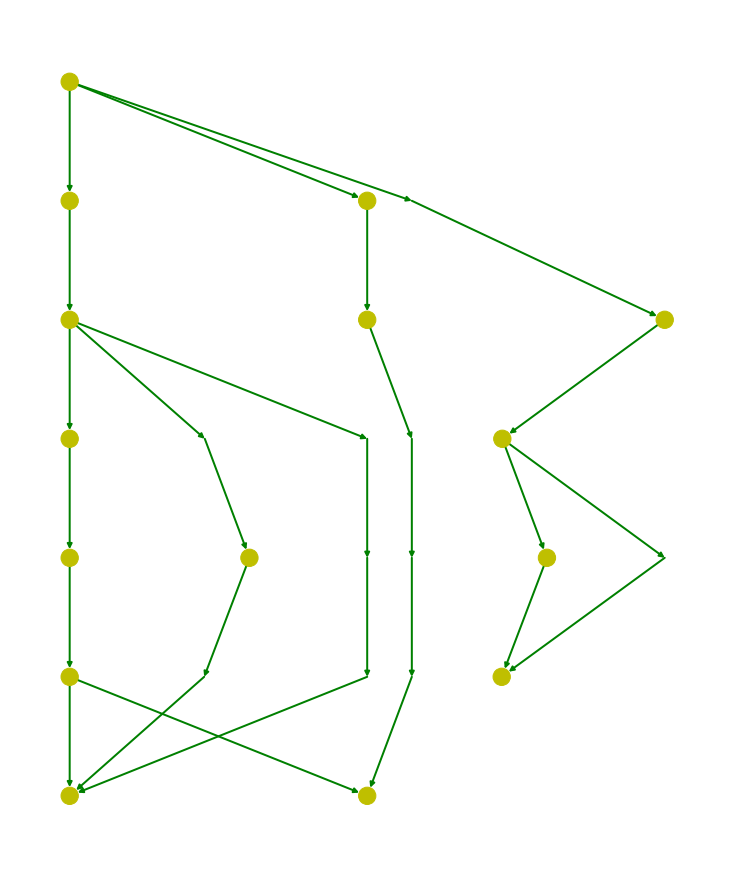

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 12))
nx.draw(G_new, pos=best_coord, with_labels=False, nodelist=list(sizes.keys()), node_size=list(sizes.values()), \
        font_size=20, node_color='y', width=2, edge_color='g')
plt.savefig('graph_graham_coffman_with_dummies.png')
plt.show()

Напишем теперь алгоритм для визуализации графа с минимальным количеством dummy-вершин

In [24]:
def get_target(graph):
  targets = []
  children = get_adj_list(graph)
  parents = get_parents(graph)
  for node in nodes:
    targets.append(len(children[node]) - len(parents[node]))
  return targets

In [25]:
def get_restrictions(graph):
  nodes = get_nodes(graph)
  edges = get_edges(graph)
  matr = np.zeros((len(edges), len(nodes)))
  for i, e in enumerate(edges):
    matr[i, nodes.index(e[0])] = -1
    matr[i, nodes.index(e[1])] = 1
  restr = (-1) * np.ones((len(edges),))
  return matr, restr

In [26]:
def optimization(graph):
  nodes = get_nodes(graph)
  to_be_minimized = get_target(graph)
  restrictions = get_restrictions(graph)
  optim_result = linprog(to_be_minimized, A_ub=restrictions[0], b_ub=restrictions[1], bounds=(list([(1, None)] * len(nodes))))
  return optim_result

In [27]:
def min_dummy_vertices_algo(graph):
  nodes = get_nodes(graph)
  optim_result = optimization(graph).x
  tmp_coord = [round(x) for x in optim_result]
  y_coords = [(x - min(tmp_coord)) for x in tmp_coord]
  layers = dict()
  for i in range(max(y_coords) + 1):
    layers[i] = []
  for i, y in enumerate(y_coords):
    layers[y].append(nodes[i])
  return layers


In [28]:
layers = min_dummy_vertices_algo(G)
layers

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


{0: ['n11', 'n14'],
 1: ['n13'],
 2: ['n6', 'n7', 'n10', 'n12'],
 3: ['n5', 'n9'],
 4: ['n1', 'n4', 'n8'],
 5: ['n2', 'n3'],
 6: ['n0']}

In [29]:
def adding_dummy(gr, layers):
  graph = gr.copy()
  cnt_dum = 1
  for layer in list(layers.keys())[::-1]:
    for node in layers[layer]:
      children = get_adj_list(graph)
      for dest in children[node]:
        node_layer, dest_layer = get_layer_of_nodes(layers, node, dest)
        if node_layer - dest_layer > 1:
          graph.add_node(f'd{cnt_dum}')
          graph.remove_edge(node, dest)
          graph.add_edge(node, f'd{cnt_dum}')
          graph.add_edge(f'd{cnt_dum}', dest)
          layers[node_layer - 1].append(f'd{cnt_dum}')
          cnt_dum += 1
  
  for k, v in layers.items():
    layers[k] = list(set(v))
  return graph, layers

In [30]:
G_new, new_layers = adding_dummy(G, layers)

In [31]:
def get_coords(graph, layers_with_dummies):
  x = dict()
  y = dict()
  nodes = get_nodes(graph)
  for layer in layers_with_dummies:
    x_coord = 0
    for vertex in layers_with_dummies[layer]:
      x[vertex] = x_coord
      x_coord += 1
      y[vertex] = layer
  coordinates = dict()
  for node in nodes:
    coordinates[node] = (x[node], y[node])
  return coordinates

In [32]:
def get_new_coordinates(graph, layers):
  coordinates = get_coords(graph, layers)
  parents = get_parents(graph)
  children = get_adj_list(graph)
  for i in range(10):
    for node in coordinates.keys():
      if node.count('d') > 0:
        parents_coord = np.mean([coordinates[x][0] for x in parents[node]])
        children_coord = np.mean([coordinates[x][0] for x in children[node]])
        coordinates[node] = ((parents_coord + children_coord + 0.3) / 2, coordinates[node][1])
  return coordinates

new_coord = get_new_coordinates(G_new, new_layers)
# new_coord

In [33]:
def get_new_layer_distribution(gr):
  layers = min_dummy_vertices_algo(gr)
  new_layers = dict()
  graph, layers = adding_dummy(gr, layers)
  adj_list = get_adj_list(graph)
  parents = get_parents(graph)
  isolated = []
  for layer in layers.keys():
    for ch in layers[layer]:
        if parents[ch] == [] and adj_list[ch] == []:
          isolated.append((layer, ch))
  for layer in list(layers.keys())[::-1]:
    new_layers[layer - 1] = []
    if layer == list(layers.keys())[-1]:
      new_layers[layer] = []
      new_layers[layer] += layers[layer]
    nodes = layers[layer]
    for node in nodes:
      children = []
      try:
        for child in layers[layer - 1]:
          if child in adj_list[node]:
            children.append(child)
        parent = parents[node]
        if children == [] and parent == []:
          new_layers[layer].append(node)
        for child in children:
          if child not in new_layers[layer - 1]:
            new_layers[layer - 1].append(child)

      except:
        pass
    layers[layer - 1] = new_layers[layer - 1]
  for isol in isolated:
    new_layers[isol[0]].append(isol[1])
  return new_layers

new_layers = get_new_layer_distribution(G)
new_layers

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


{-1: [],
 0: ['n14', 'n11'],
 1: ['d7', 'n13', 'd9', 'd8'],
 2: ['n6', 'n7', 'n12', 'd6', 'n10'],
 3: ['n5', 'd3', 'd2', 'n9', 'd5', 'd4'],
 4: ['n4', 'n1', 'n8'],
 5: ['n3', 'd1', 'n2'],
 6: ['n0']}

In [34]:
def correcting_coordinates(gr):
  layers = min_dummy_vertices_algo(gr)
  graph, layers = adding_dummy(gr, layers)
  new_layers = get_new_layer_distribution(gr)
  # print(layers)
  # print(new_layers)
  old_coords = get_new_coordinates(G_new, new_layers)
  new_coords = dict()
  coord_per_layer = dict()
  for layer in layers.keys():
    nodes = layers[layer]
    coord_per_layer[layer] = []
    for node in nodes:
      coord_per_layer[layer].append(old_coords[node])
  # print(coord_per_layer)
  for k, v in coord_per_layer.items():
    coord_per_layer[k] = sorted(v, key=lambda x: x[0])
    
  # print('new_layers = ', new_layers)
  for layer in new_layers.keys():
    nodes = new_layers[layer]
    # print(nodes)
    for node in nodes:
      # print(coord_per_layer[layer])
      if coord_per_layer[layer] != []:
        new_coords[node] = coord_per_layer[layer].pop(0)

  return new_coords


best_coord = correcting_coordinates(G)
best_coord

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


{'d1': (0.65, 5),
 'd2': (1.15, 3),
 'd3': (0.15, 3),
 'd4': (3.15, 3),
 'd5': (3, 3),
 'd6': (2.1007324218749996, 2),
 'd7': (0.65, 1),
 'd8': (2.65, 1),
 'd9': (1.7003662109374997, 1),
 'n0': (0, 6),
 'n1': (1, 4),
 'n10': (4, 2),
 'n11': (1, 0),
 'n12': (2, 2),
 'n13': (1, 1),
 'n14': (0, 0),
 'n2': (2, 5),
 'n3': (0, 5),
 'n4': (0, 4),
 'n5': (0, 3),
 'n6': (0, 2),
 'n7': (1, 2),
 'n8': (2, 4),
 'n9': (2.2007324218749997, 3)}

In [35]:
sizes_dum = get_sizes_of_nodes(G_new.nodes)
# sizes_dum

# Результат отрисовки графа с помощью алгоритма минимизации числа dummy вершин

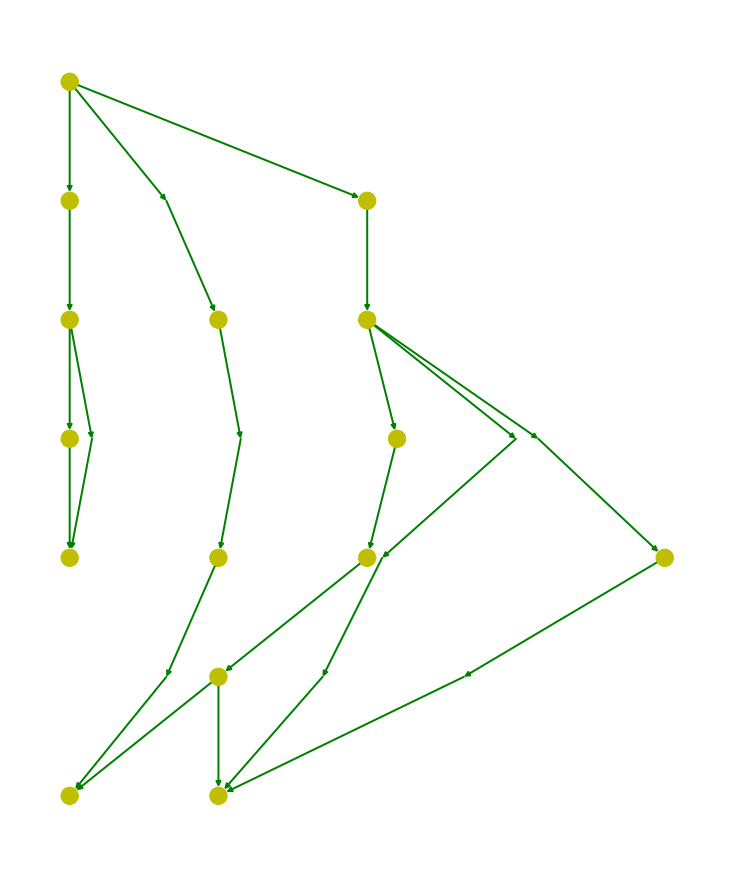

In [36]:
plt.figure(figsize=(10, 12))
nx.draw(G_new, pos=best_coord, with_labels=False, nodelist=list(sizes_dum.keys()), node_size=list(sizes_dum.values()), \
        font_size=20, node_color='y', width=2, edge_color='g')
plt.savefig('minimize_dummies.png')
plt.show()